### <strong>第三次淺度機器學習作業：分類器大評比</strong>
學號：711233109

姓名：張子恩 
<hr>

 <font color=steelblue>**作業目標**</font>
  <br>
  
本次作業使用多元羅吉斯回歸，支持向量機，神經網路三種分類器和時下最流行的CNN(卷積神經網路)，分類三組資料(葡萄酒成份、AT&T人臉影像、Yale Face人臉影像)，最後再將資料進行主成分分析，再交由四種分類器學習，最後總結兩種資料型態，四個分類器的表現。

<hr>

#### ***前言***
精確度(accuracy)是指模型預測正確的樣本佔所有預測為該類別的樣本的比例，模型不能只看精確度來評量分類氣好壞，召回率(recall)是指模型正確檢測到的正樣本佔所有實際正樣本的比例，F1-score 則是精確度和召回率的加權平均值，以上則是越高越好，但越高的同時也要觀察分類器是否有過度擬合的問題，以上是要小心的。因資料皆為平衡下進行，所以使用 accuracy來衡量分類器好壞。  
本次作業中，安裝了許多套件，為了排版整潔，故將他們整理好先放在最前面。  
而為了公平比較其測試、訓練資料佔比為7:3，通過觀察發現，將迭代變化率(tol)設置為0.001時，準確率不會降低，同時計算速度也會提高。因此，我們將迭代變化率(tol)設置為0.001。

In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,Reshape
from keras.optimizers import SGD, Adam
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV
from keras.layers import  Input,InputLayer
import scipy



#### ***習題一 : 葡萄酒成分預測***
資料包括3個產區、178瓶葡萄酒、13種葡萄酒成分，
分別使用 Logistic、SVM、MLP進行預測產區。

檔案讀取後，分成訓練、測試集後，再進行標準化。

In [2]:
df = pd.read_excel('C:/vscode/淺度hw3練習/wine.xlsx')
X = np.array(df.iloc[:, :-1]) # 排 除 最 後 一 欄 標 籤
y = np.array(df.iloc[:, -1]) # 標籤欄
# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.30)
# Standardize data
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.fit_transform(X_test)

1.使用Logistic進行分析後，列印出準確率回報。

In [3]:
#Logist

opts = dict(tol = 0.001, max_iter = int(1e6), verbose=1)
solver = 'lbfgs' # ’lbfgs’ is the default
# solver = 'liblinear'
# solver = ’newton−cg’
clf_original = LogisticRegression(solver = solver, **opts)
clf_original.fit(X_train_, y_train)
y_pred = clf_original.predict(X_test_)
# 測 試 資 料 之 準 確 率 回 報
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.81      1.00      0.90        13
           2       1.00      0.88      0.94        26
           3       1.00      1.00      1.00        15

    accuracy                           0.94        54
   macro avg       0.94      0.96      0.95        54
weighted avg       0.95      0.94      0.95        54



#### **討論**
此資料再使用LogisticRegression學習後，預測率有94%，recall、f1-score也有90%以上的表現。

2.使用SVM進行分析後，列印出準確率回報。

In [4]:
#SVM

C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 0.001, max_iter = int(1e6))
# opts = dict(C = C, decision_function_shape = ’ovo’, \
# tol = 1e−6, max_iter = int(1e6))
clf_svm = SVC(kernel='linear', **opts)
# clf_svm = SVC(kernel=”rbf”, gamma=0.2, **opts)
# clf_svm = SVC(kernel=”poly”, degree=3, gamma=”auto”, **opts)
# clf_svm = LinearSVC(**opts) # one vs the rest
clf_svm.fit(X_train, y_train)
predictions = clf_svm.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           2       0.96      0.92      0.94        26
           3       1.00      0.93      0.97        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



#### **討論**
此資料再使用SVM學習後，預測率有94%，recall、f1-score也有93%以上的表現。

3.使用MLP進行分析，列印出準確率回報。

In [7]:
#MLP

# hidden_layers = (512,) # one hidden layer
# activation = ’relu’ # the default
hidden_layers = (30,)
activation = 'logistic'
opts = dict(hidden_layer_sizes = hidden_layers , verbose = True,activation = activation, tol = 0.001, max_iter = int(1e6))
# solver = ’sgd’ # not efficient, need more tuning
# solver = ’lbfgs’ # not suitable here
solver = 'adam' # default solver
clf_MLP = MLPClassifier(solver = solver, **opts)
clf_MLP.fit(X_train, y_train)
predictions = clf_MLP.predict(X_test)

Iteration 1, loss = 1.22675183
Iteration 2, loss = 1.21339745
Iteration 3, loss = 1.20208743
Iteration 4, loss = 1.19211238
Iteration 5, loss = 1.18322240
Iteration 6, loss = 1.17519910
Iteration 7, loss = 1.16780747
Iteration 8, loss = 1.16086454
Iteration 9, loss = 1.15426658
Iteration 10, loss = 1.14799596
Iteration 11, loss = 1.14213129
Iteration 12, loss = 1.13677948
Iteration 13, loss = 1.13183030
Iteration 14, loss = 1.12705435
Iteration 15, loss = 1.12248156
Iteration 16, loss = 1.11828521
Iteration 17, loss = 1.11459451
Iteration 18, loss = 1.11119585
Iteration 19, loss = 1.10802368
Iteration 20, loss = 1.10502974
Iteration 21, loss = 1.10219670
Iteration 22, loss = 1.09956353
Iteration 23, loss = 1.09714414
Iteration 24, loss = 1.09481334
Iteration 25, loss = 1.09244274
Iteration 26, loss = 1.09012368
Iteration 27, loss = 1.08849022
Iteration 28, loss = 1.08671010
Iteration 29, loss = 1.08467486
Iteration 30, loss = 1.08282485
Iteration 31, loss = 1.08121222
Iteration 32, los

#### **討論**
4.此資料再使用SVM，迭代變化率限制在0.001下，總共迭代了438次，損失下降至0.158。接下來列印出準確率回報。

In [8]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           2       0.93      0.96      0.94        26
           3       1.00      0.87      0.93        15

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54



#### **討論**
此資料再使用SVM學習後，預測率有94%，recall、f1-score也有93%以上的表現。

#### **使用PCA分析**
選擇前五個主成分，這些成分佔總變異量的大約70%（由第一次作業得知）。

5.接著使用Logistic進行學習後，列印出準確率回報。

In [11]:
#PCA

pca = PCA(n_components = 5).fit(X_train_)
Z_train = pca.transform(X_train_)
Z_test = pca.transform(X_test_)
opts = dict(tol = 0.001, max_iter = int(1e6), verbose=1)
solver ='lbfgs' # ’lbfgs’ is the default
# solver = ’liblinear’
# solver = ’newton−cg’
clf_PCA = LogisticRegression(solver = solver, **opts)
clf_PCA.fit(Z_train, y_train)
y_pred = clf_PCA.predict(Z_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.76      1.00      0.87        13
           2       1.00      0.85      0.92        26
           3       0.93      0.93      0.93        15

    accuracy                           0.91        54
   macro avg       0.90      0.93      0.91        54
weighted avg       0.92      0.91      0.91        54



#### **討論**
此資料再使用前五個主成份在使用LogisticRegression學習後，預測率有91%，recall、f1-score有85% ~ 93%的表現。

6.使用SVM進行分析，列印出準確率回報。

In [12]:
#PCA_SVM

C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 0.001, max_iter = int(1e6))
# opts = dict(C = C, decision_function_shape = ’ovo’, \
# tol = 1e−6, max_iter = int(1e6))
clf_svm = SVC(kernel='linear', **opts)
# clf_svm = SVC(kernel=”rbf”, gamma=0.2, **opts)
# clf_svm = SVC(kernel=”poly”, degree=3, gamma=”auto”, **opts)
# clf_svm = LinearSVC(**opts) # one vs the rest
clf_svm.fit(Z_train, y_train)
predictions = clf_svm.predict(Z_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.68      1.00      0.81        13
           2       1.00      0.77      0.87        26
           3       1.00      1.00      1.00        15

    accuracy                           0.89        54
   macro avg       0.89      0.92      0.89        54
weighted avg       0.92      0.89      0.89        54



#### **討論**
此資料再使用前五個主成份在使用SVM學習後，預測率有91%，recall、f1-score有81% ~ 93%的表現，其中預測第三間酒商為完美預測。

7.使用MLP進行分析，列印出準確率回報。

In [14]:
#MLP_PCA

# hidden_layers = (512,) # one hidden layer
# activation = ’relu’ # the default
hidden_layers = (64,)
activation = 'logistic'
opts = dict(hidden_layer_sizes = hidden_layers , verbose = True,activation = activation, tol = 0.001, max_iter = int(1e6))
# solver = ’sgd’ # not efficient, need more tuning
# solver = ’lbfgs’ # not suitable here
solver = 'adam' # default solver
clf_MLP = MLPClassifier(solver = solver, **opts)
clf_MLP.fit(Z_train, y_train)
predictions = clf_MLP.predict(Z_test)
print(classification_report(y_test, predictions))

Iteration 1, loss = 1.11079875
Iteration 2, loss = 1.10399287
Iteration 3, loss = 1.09758937
Iteration 4, loss = 1.09149122
Iteration 5, loss = 1.08562812
Iteration 6, loss = 1.07994368
Iteration 7, loss = 1.07438927
Iteration 8, loss = 1.06892403
Iteration 9, loss = 1.06351530
Iteration 10, loss = 1.05813866
Iteration 11, loss = 1.05277718
Iteration 12, loss = 1.04742031
Iteration 13, loss = 1.04206254
Iteration 14, loss = 1.03670210
Iteration 15, loss = 1.03133973
Iteration 16, loss = 1.02597768
Iteration 17, loss = 1.02061885
Iteration 18, loss = 1.01526610
Iteration 19, loss = 1.00992179
Iteration 20, loss = 1.00458738
Iteration 21, loss = 0.99926334
Iteration 22, loss = 0.99394907
Iteration 23, loss = 0.98864306
Iteration 24, loss = 0.98334305
Iteration 25, loss = 0.97804630
Iteration 26, loss = 0.97274992
Iteration 27, loss = 0.96745107
Iteration 28, loss = 0.96214722
Iteration 29, loss = 0.95683627
Iteration 30, loss = 0.95151663
Iteration 31, loss = 0.94618718
Iteration 32, los

#### **討論**
此資料再使用SVM模型，隱藏層為64，迭代變化率限制在0.001下，總共迭代了254次，損失下降至0.156，完成學習接下來打印出準確率回報。
根據報告，其準確率有89%，對於類別1，模型的精確度只有0.68，召回率為1.00，F1得分為0.81。對於類別2，精確度為1.00，召回率為0.81，F1得分為0.89。對於類別3，精確度為1.00，召回率為0.93，F1得分為0.97。

#### **結論**
|  | Logistic | SVM |MLP|  
|----------|:---------:|---------:|---------:
|    accuracy |   0.94  |    0.94|0.94|
|  accuracy(前五個主成分)   |   0.91  |    0.89|0.89|  

上表為根據上面執行結果，整理出來其準確率是差不多的，資料取前五個主成分時，Logistic的分類結果較好，根據此資料，就準確率而言使用Logistic比較合適。



C:\Users\USER\AppData\Local\Temp\ipykernel_31660\570761094.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(D['m'])#168
C:\Users\USER\AppData\Local\Temp\ipykernel_31660\570761094.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(D['n'])#192


              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.93      1.00      0.96        13
           2       0.94      1.00      0.97        17
           3       1.00      0.95      0.97        20
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        11
           6       0.95      0.95      0.95        20
           7       1.00      0.92      0.96        24
           8       0.88      1.00      0.93        21
           9       1.00      1.00      1.00        20
          10       1.00      0.89      0.94        19
          11       1.00      0.95      0.97        20
          12       0.95      1.00      0.97        19
          13       1.00      1.00      1.00        15
          14       0.93      0.96      0.95        27
          15       1.00      0.91      0.95        22
          16       0.94      1.00      0.97        17
          17       1.00    

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.59      1.00      0.74        13
           2       0.71      1.00      0.83        17
           3       1.00      0.95      0.97        20
           4       0.96      1.00      0.98        23
           5       0.83      0.91      0.87        11
           6       0.90      0.90      0.90        20
           7       0.88      0.88      0.88        24
           8       0.94      0.71      0.81        21
           9       0.81      0.85      0.83        20
          10       0.95      1.00      0.97        19
          11       1.00      0.95      0.97        20
          12       1.00      0.95      0.97        19
          13       1.00      1.00      1.00        15
          14       0.93      1.00      0.96        27
          15       1.00      0.86      0.93        22
          16       1.00      1.00      1.00        17
          17       1.00    

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       0.93      1.00      0.96        13
           2       0.94      1.00      0.97        17
           3       1.00      0.95      0.97        20
           4       1.00      1.00      1.00        23
           5       1.00      0.91      0.95        11
           6       0.95      0.95      0.95        20
           7       1.00      0.92      0.96        24
           8       0.95      1.00      0.98        21
           9       1.00      1.00      1.00        20
          10       1.00      0.95      0.97        19
          11       1.00      0.90      0.95        20
          12       0.95      0.95      0.95        19
          13       0.94      1.00      0.97        15
          14       0.90      1.00      0.95        27
          15       0.95      0.95      0.95        22
          16       0.94      1.00      0.97        17
          17       1.00    

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       0.92      0.92      0.92        13
           2       0.89      1.00      0.94        17
           3       1.00      0.95      0.97        20
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        11
           6       0.94      0.85      0.89        20
           7       1.00      0.92      0.96        24
           8       0.95      0.95      0.95        21
           9       0.90      0.90      0.90        20
          10       1.00      0.95      0.97        19
          11       1.00      0.85      0.92        20
          12       0.90      0.95      0.92        19
          13       0.94      1.00      0.97        15
          14       0.82      1.00      0.90        27
          15       0.95      0.95      0.95        22
          16       1.00      1.00      1.0

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.0259 - loss: 3.6887 - val_accuracy: 0.1452 - val_loss: 3.5080
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.2213 - loss: 3.1809 - val_accuracy: 0.6210 - val_loss: 1.4815
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7493 - loss: 1.0201 - val_accuracy: 0.8838 - val_loss: 0.4688
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9448 - loss: 0.2572 - val_accuracy: 0.9419 - val_loss: 0.2377
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9905 - loss: 0.0785 - val_accuracy: 0.9599 - val_loss: 0.1704
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9945 - loss: 0.0445 - val_accuracy: 0.9613 - val_loss: 0.1482
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9950 - loss: 0.0254 - val_accuracy: 0.9654 - val_loss: 0.1350
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9977 - loss: 0.0234 - val_accuracy: 0.

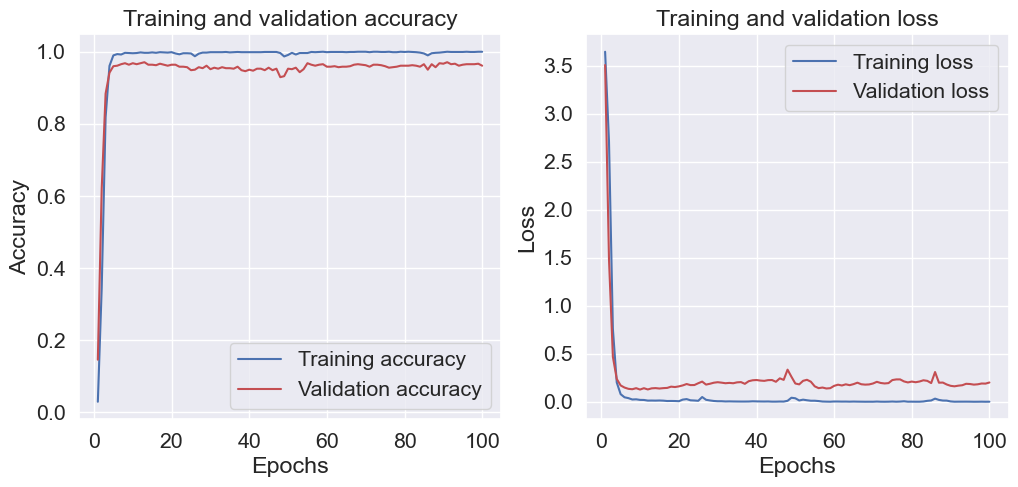

[89.71258147 89.97678468 90.21853513 90.45734874 90.68155677 90.89700363
 91.10348015 91.29925131 91.48582498 91.66375938]


              precision    recall  f1-score   support

           0       1.00      0.78      0.88        23
           1       0.93      1.00      0.96        13
           2       0.76      0.94      0.84        17
           3       0.88      0.75      0.81        20
           4       0.88      1.00      0.94        23
           5       0.71      0.91      0.80        11
           6       0.88      0.70      0.78        20
           7       0.71      0.71      0.71        24
           8       0.85      0.81      0.83        21
           9       0.89      0.85      0.87        20
          10       0.84      0.84      0.84        19
          11       0.89      0.85      0.87        20
          12       0.82      0.74      0.78        19
          13       0.93      0.93      0.93        15
          14       0.85      0.85      0.85        27
          15       0.81      0.77      0.79        22
          16       0.84      0.94      0.89        17
          17       0.94    

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        23
           1       0.93      1.00      0.96        13
           2       0.85      1.00      0.92        17
           3       0.94      0.85      0.89        20
           4       1.00      1.00      1.00        23
           5       0.77      0.91      0.83        11
           6       0.95      0.90      0.92        20
           7       0.95      0.88      0.91        24
           8       0.91      0.95      0.93        21
           9       0.94      0.80      0.86        20
          10       1.00      0.89      0.94        19
          11       1.00      0.85      0.92        20
          12       0.95      0.95      0.95        19
          13       1.00      1.00      1.00        15
          14       0.87      0.96      0.91        27
          15       0.86      0.86      0.86        22
          16       0.89      1.00      0.94        17
          17       0.90    

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        23
           1       0.62      1.00      0.76        13
           2       0.84      0.94      0.89        17
           3       0.93      0.70      0.80        20
           4       0.96      1.00      0.98        23
           5       0.62      0.91      0.74        11
           6       0.75      0.90      0.82        20
           7       0.87      0.83      0.85        24
           8       0.94      0.71      0.81        21
           9       0.77      0.85      0.81        20
          10       0.85      0.89      0.87        19
          11       1.00      0.90      0.95        20
          12       1.00      0.95      0.97        19
          13       1.00      1.00      1.00        15
          14       0.89      0.93      0.91        27
          15       0.86      0.86      0.86        22
          16       0.89      1.00      0.94        17
          17       0.95    

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.82      0.61      0.70        23
           1       0.69      0.85      0.76        13
           2       0.71      0.88      0.79        17
           3       0.83      0.75      0.79        20
           4       0.91      0.87      0.89        23
           5       0.56      0.82      0.67        11
           6       0.62      0.80      0.70        20
           7       0.68      0.62      0.65        24
           8       0.78      0.67      0.72        21
           9       0.82      0.70      0.76        20
          10       0.65      0.89      0.76        19
          11       0.85      0.85      0.85        20
          12       0.89      0.89      0.89        19
          13       0.78      0.47      0.58        15
          14       0.91      0.74      0.82        27
          15       0.74      0.64      0.68        22
          16       0.79      0.88      0.

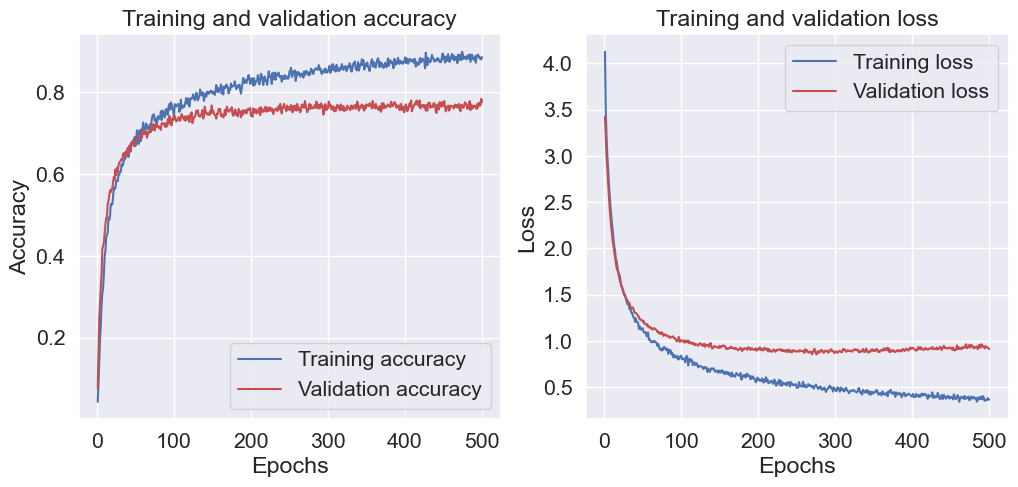